In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('precision', 5)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('test_data_NBA.csv')

In [3]:
# proveravamo velicinu tabele
data.shape

(1340, 21)

In [4]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [5]:
print(data['TARGET_5Yrs'].unique())

[0 1]


In [6]:
# 0 - dogadjaj da igrac nije zavrsio NBA karijeru nakon 5 godina
# 1 - dogadjaj da je igrac zavrsio NBA karijeru nakon 5 godina

In [7]:
# da li su imena igraca jedinstvena?
data['Name'].nunique()

1294

In [8]:
# kako imamo manje jedinstvenih imena nego redova u tabeli mozemo zakluciti da imamo imena koja se dupliraju
# redovi nisu jedinstveni!

In [9]:
# koliko imamo igraca koji se pojavljuju uduplano bar jednom
sum(data.groupby('Name')['Name'].count() > 1)

29

In [11]:
print(data.groupby('Name')['Name'].count()[:10])

Name
A.C. Green         1
A.J. English       1
A.J. Price         1
Aaron Brooks       1
Aaron Gordon       1
Aaron Gray         1
Aaron McKie        1
Acie Earl          1
Acie Law           1
Adam Harrington    1
Name: Name, dtype: int64


In [12]:
# primer igraca koji ima isto ime u vise redova
data[data['Name']=='Chris Smith']

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0


In [13]:
# primer igraca koji ima razlicite vrednosti atributa a takodje se i ciljna promenljiva razlikuje
data[data['Name']=='Dee Brown']

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,1.7,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,0.5,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1


In [14]:
# primer igraca koji ima vrednosti atribbuta dok se ciljna promenljiva razlikuje
data[data['Name']=='Cedric Henderson']

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1126,Cedric Henderson,82,30.8,10.1,4.2,8.8,48.0,0.0,0.0,0.0,1.7,2.3,71.6,0.9,3.1,4.0,2.0,1.2,0.6,2.0,1
1127,Cedric Henderson,82,30.8,10.1,4.2,8.8,48.0,0.0,0.0,0.0,1.7,2.3,71.6,0.9,3.1,4.0,2.0,1.2,0.6,2.0,0


In [15]:
# imamo slucaj kad su nam duplirani redovi ali su sve kolone iste [koristicemo opciju drop_duplicates]
# imamo slucaj kad su sve kolone iste sem kolone target_5yrs, uzima vrednost i 0 i 1 [resicemo tako sto iskljucujemo te klijente iz analize]
# imamo slucaj kad su imena ista a vrednosti atributa razlicite, pretpostavka je da su to dva razlicita kosarkasa sa istim imenom [dodajemo novu kolonu u tabeli i nju koristimo kao indeks] 

In [16]:
data_an = data.groupby('Name')['TARGET_5Yrs'].nunique().to_frame()
data_an.reset_index(inplace=True)
name_clean = list(data_an[data_an['TARGET_5Yrs'] > 1]['Name'])
print(name_clean)
data_an.sort_values('TARGET_5Yrs', ascending=False).head()

['Bobby Jones', 'Cedric Henderson', 'Charles Jones', 'Charles Smith', 'David Lee', 'Dee Brown', 'Glen Rice', 'Glenn Robinson', 'Larry Drew', 'Larry Johnson', 'Mark Davis', 'Michael Smith', 'Tim Hardaway', 'Walker Russell']


,Name,TARGET_5Yrs
468,Glenn Robinson,2
117,Bobby Jones,2
1196,Tim Hardaway,2
843,Mark Davis,2
185,Charles Jones,2


In [17]:
index_clean = data.loc[data.isin(name_clean).any(axis=1)].index.tolist()
print(index_clean)

[18, 19, 71, 72, 73, 74, 120, 121, 126, 127, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 223, 224, 225, 226, 364, 365, 366, 367, 368, 369, 472, 473, 553, 554, 848, 849, 870, 871, 1126, 1127, 1229, 1230]


In [18]:
data = data.drop(index=index_clean)

In [19]:
data = data.drop_duplicates()

In [20]:
print('Broj igraca sa istim imenom i prezimenom: {}.'.format(sum(data.groupby('Name')['Name'].count() > 1)))

Broj igraca sa istim imenom i prezimenom: 8.


In [21]:
data_name = data.groupby('Name')['Name'].count().to_frame()
data_name.columns = ['Name1']
data_name.reset_index(inplace=True)
data_name.sort_values('Name1', ascending=False).head()

,Name,Name1
111,Bob Martin,2
537,Jamie Feick,2
170,Carlos Rogers,2
567,Jeff Taylor,2
529,James Johnson,2


In [22]:
# primer gde imamo isto ime igraca medjutim vrednosti atributa se razlikuju
# za ovaj slucaj cu pretpostaviti da su to dva razlicita igraca sa istim imenom
data[data['Name']=='Bob Martin']

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
311,Bob Martin,43,6.7,3.4,1.2,3.1,37.8,0.1,0.3,20.0,1.0,1.5,63.6,0.3,0.7,1.0,0.8,0.3,0.1,0.8,0
312,Bob Martin,53,10.1,2.1,0.8,1.7,45.5,0.0,0.0,0.0,0.6,1.0,60.8,0.7,1.5,2.2,0.3,0.1,0.6,0.6,0


In [23]:
data.shape

(1288, 21)

In [24]:
data['key'] = range(data.shape[0])
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,2
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,3
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,4


In [25]:
data[data['Name']=='Bob Martin']

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
311,Bob Martin,43,6.7,3.4,1.2,3.1,37.8,0.1,0.3,20.0,1.0,1.5,63.6,0.3,0.7,1.0,0.8,0.3,0.1,0.8,0,283
312,Bob Martin,53,10.1,2.1,0.8,1.7,45.5,0.0,0.0,0.0,0.6,1.0,60.8,0.7,1.5,2.2,0.3,0.1,0.6,0.6,0,284


In [26]:
# kreiramo novi index tabele i to ce biti kolona "key"
data = data.reset_index()

In [27]:
data[data['Name']=='Bob Martin']

,index,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
283,311,Bob Martin,43,6.7,3.4,1.2,3.1,37.8,0.1,0.3,20.0,1.0,1.5,63.6,0.3,0.7,1.0,0.8,0.3,0.1,0.8,0,283
284,312,Bob Martin,53,10.1,2.1,0.8,1.7,45.5,0.0,0.0,0.0,0.6,1.0,60.8,0.7,1.5,2.2,0.3,0.1,0.6,0.6,0,284


In [28]:
dataIndexName = data[['Name', 'key']]
data = data.drop(columns=['Name', 'index'], axis=1)

In [29]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,2
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,3
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,4


In [30]:
dataIndexName.head()

,Name,key
0,Brandon Ingram,0
1,Andrew Harrison,1
2,JaKarr Sampson,2
3,Malik Sealy,3
4,Matt Geiger,4


In [31]:
print('Dimenzije tabele "data" je: {}, dok su dimenzije tabele "dataIndexName" je: {}'.format(data.shape, dataIndexName.shape))

Dimenzije tabele "data" je: (1288, 21), dok su dimenzije tabele "dataIndexName" je: (1288, 2)


In [32]:
# da li imamo NA vrednosti u dataset-u
data.isna().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
key             0
dtype: int64

In [33]:
# prikazaimo deo dataseta gde je upisana NA vrednost
data[data['3P%'].isna()]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
310,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0,310
311,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0,311
329,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1,329
351,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1,351
362,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0,362
469,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0,469
471,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1,471
472,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1,472
483,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0,483
519,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,0.5,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1,519


In [34]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,2
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,3
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,4


In [35]:
# mozemo primetiti da kolona 3p%, koja je napravljena od kolona 3P Made i 
data['3P%'] = data['3P%'].combine_first(data['3P Made']/(data['3PA']+0.01)*100)

In [36]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,2
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,3
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,4


In [37]:
print('Broj NA vrednosti: {}.'.format(sum(data.isna().sum())))

Broj NA vrednosti: 0.


In [38]:
print('Prikazimo raspodelu igraca po varijabli "TARGET_5Yrs": \n {}.'.format(data.groupby('TARGET_5Yrs')['key'].count()))

Prikazimo raspodelu igraca po varijabli "TARGET_5Yrs": 
 TARGET_5Yrs
0    484
1    804
Name: key, dtype: int64.


In [39]:
# prikazimo osnovne statistike atributa
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key
count,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000,1288.00000
mean,60.27640,17.57539,6.76584,2.61475,5.85776,44.16149,0.25047,0.78424,19.29884,1.28750,1.80823,70.33595,1.00753,2.02011,3.02655,1.53618,0.61452,0.37034,1.18455,0.62422,643.50000
std,17.39673,8.24877,4.30060,1.65999,3.54794,6.10785,0.38711,1.06943,16.16105,0.97376,1.30857,10.52814,0.77165,1.35023,2.04015,1.46036,0.40838,0.43258,0.71581,0.48451,371.95788
min,11.00000,3.10000,0.70000,0.30000,0.80000,23.80000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.30000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000
25%,47.00000,10.90000,3.70000,1.40000,3.30000,40.20000,0.00000,0.00000,0.00000,0.60000,0.90000,64.70000,0.40000,1.00000,1.50000,0.60000,0.30000,0.10000,0.70000,0.00000,321.75000
50%,62.00000,16.10000,5.55000,2.10000,4.80000,43.90000,0.10000,0.30000,22.30000,1.00000,1.50000,71.20000,0.80000,1.70000,2.50000,1.10000,0.50000,0.20000,1.00000,1.00000,643.50000
75%,77.00000,22.80000,8.80000,3.40000,7.50000,47.80000,0.40000,1.20000,32.80000,1.60000,2.30000,77.50000,1.40000,2.60000,3.90000,2.00000,0.80000,0.50000,1.50000,1.00000,965.25000
max,82.00000,40.90000,28.20000,10.20000,19.80000,73.70000,2.30000,6.50000,100.00000,7.70000,10.20000,100.00000,5.30000,9.60000,13.90000,10.60000,2.50000,3.90000,4.40000,1.00000,1287.00000


In [40]:
# mozemo primetiti da nemamo nekih velikih odstupanja od srednje vrednosti i medijane bilo kog atributa
# mozemo zakljuciti da nemamo nekih znacajnih autlajera

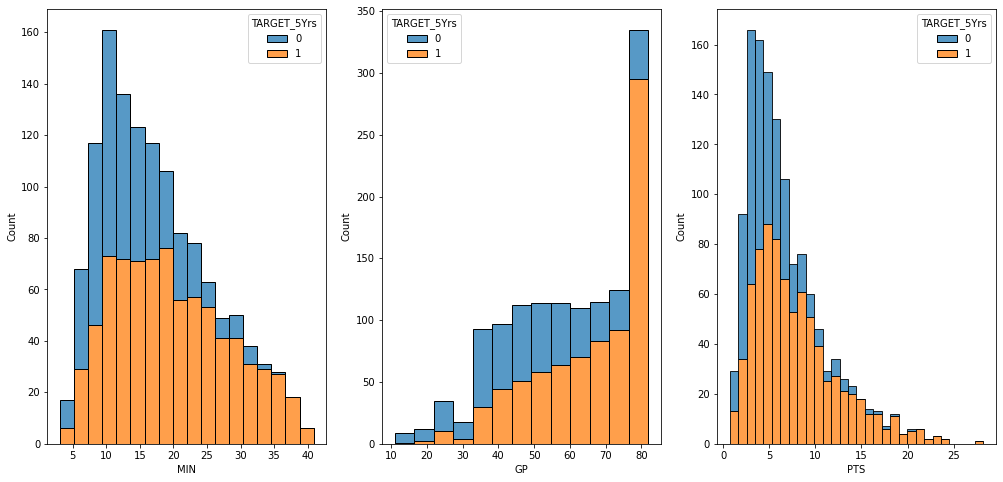

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,8))

sns.histplot(data=data, x='MIN', hue='TARGET_5Yrs', multiple="stack", ax=ax1)
sns.histplot(data=data, x='GP', hue='TARGET_5Yrs', multiple="stack", ax=ax2)
sns.histplot(data=data, x='PTS', hue='TARGET_5Yrs', multiple="stack", ax=ax3)

plt.show()

In [42]:
# sa grafika u sredini, raspodela igraca po odigranim minutima, vidimo da vecina igraca koji nisu zavrsili karijeru imali 
# su blizu 80 odigranih meceva po sezoni, dok je jako mali broj igraca (30ak) imao odigranih 80ak utakmica a da je zavrsilo
# karijeru u 5 godina

# sa grafika gore levo, vidimo da vecina igraca koja nije zavrsila karijeru nakon 5 godina u proseku u pocetnickoj sezoni 
# igrala vise od 20 minuta po utakmici, dok je kod igraca koji su zavrsili karijeru situacija obrnuta, vecina njih je imala
# u proseku manje od 20 minuta po utakmici, ovo nam moze sugerisati da je atribut MIN jako bitan prilikom pravljenja modela

# sa grafika, gore desno, raspodela igraca po poenima, vidimo da igraci koji su zavrsili karijeru nakon 5 godina imaju u 
# proseku manje od 10 poena po utakmice, ovo nam moze sugerisati da je atribut PTS jako bitan prilikom pravljenja modela

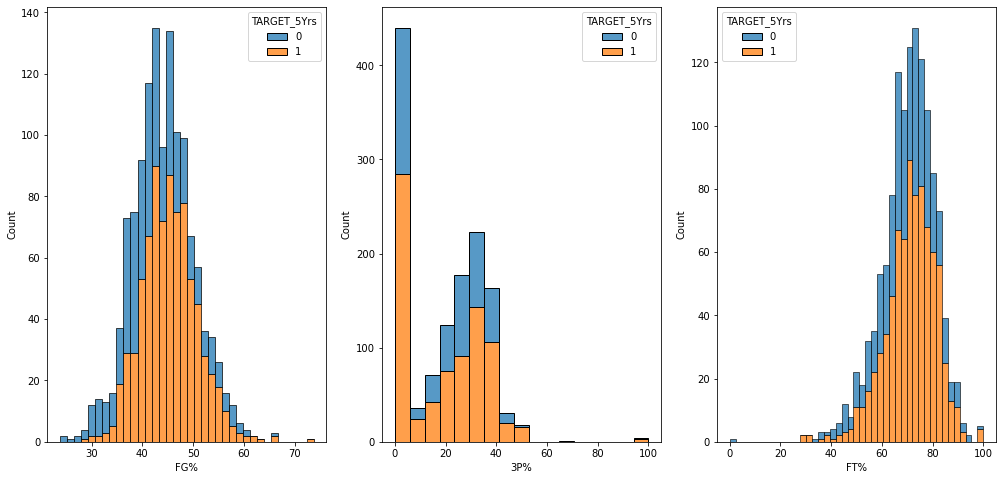

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,8))

sns.histplot(data=data, x='FG%', hue='TARGET_5Yrs', multiple="stack", ax=ax1)
sns.histplot(data=data, x='3P%', hue='TARGET_5Yrs', multiple="stack", ax=ax2)
sns.histplot(data=data, x='FT%', hue='TARGET_5Yrs', multiple="stack", ax=ax3)

plt.show()

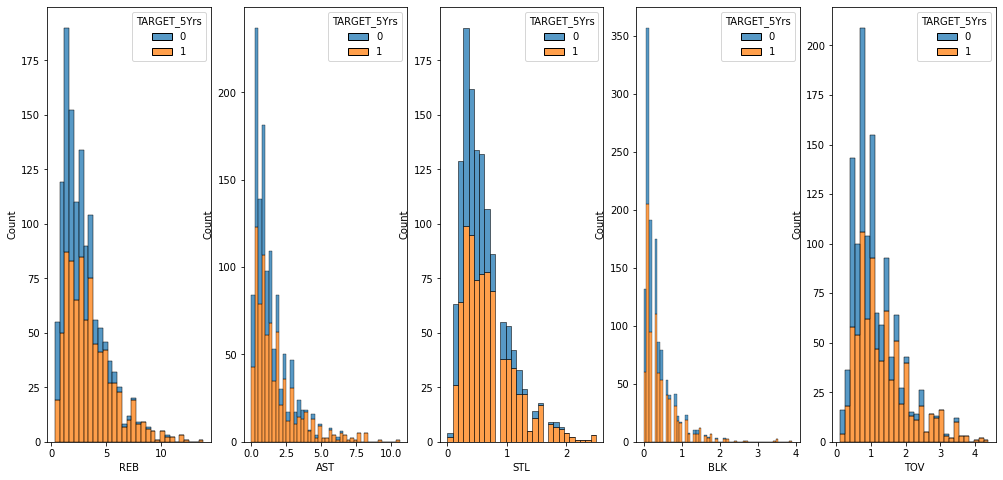

In [44]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(17, 8))

sns.histplot(data=data, x='REB', hue='TARGET_5Yrs', multiple="stack", ax=ax1)
sns.histplot(data=data, x='AST', hue='TARGET_5Yrs', multiple="stack", ax=ax2)
sns.histplot(data=data, x='STL', hue='TARGET_5Yrs', multiple="stack", ax=ax3)
sns.histplot(data=data, x='BLK', hue='TARGET_5Yrs', multiple="stack", ax=ax4)
sns.histplot(data=data, x='TOV', hue='TARGET_5Yrs', multiple="stack", ax=ax5)

plt.show()

In [45]:
# primetiomo da imamo raspodele koje su right-skewed(vrednost medijane je veca od prosecne vrednost) - ovo je i ocekivano
# vecina igraca ce imati manji broj skokova u proseku od 5, ili manje asistencija od 5.. dok je ocekivano takodje,
# da vecina igraca, bez obizra da li zavrsili karijeru ili ne, u statistickim kategorijama STL(ukradene lopte),
# BLK(blokade) i TOV(greske) ima vrednosti koje su bliske 0

# ukoliko pogledamo raspodelu igraca po skokovimo, mozemo uociti da je jako 
# mali broj igraca koji su zavrsili karijeru u 5 godina
# imao prosek skokova veci od 5 !!! 

<AxesSubplot:>

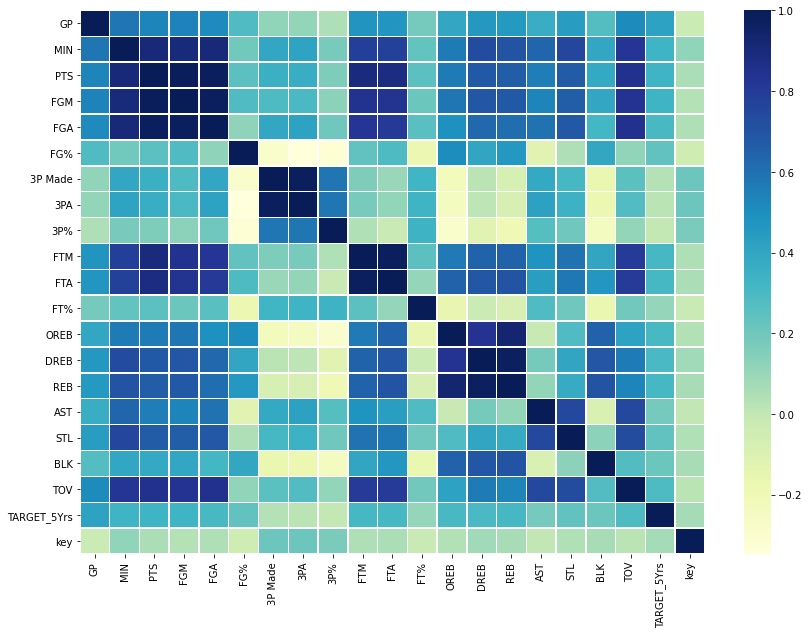

In [46]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), linewidths=.5, cmap='YlGnBu')

In [47]:
# mozemo primetiti da su najvise korelisani atributi oni koji se grupisu oko prosecnog broja suteva, 
# prosecnog broja pogodjenih suteva i % uspesnosti, zato cemo odabrati 2 od te tri kolone u daljoj analizi
# zanemarujemo u daljoj analizi sledece atribute: FGA | 3PA | FTA | OREB

# takodje, neku malu korelisanost vidimo izmedju ciljne promenljive i atributa: TOV, FTM, FTA, GP, MIN, PTS

data = data.drop(columns=['FGA', 'FTA', '3PA', 'OREB'], axis=1)

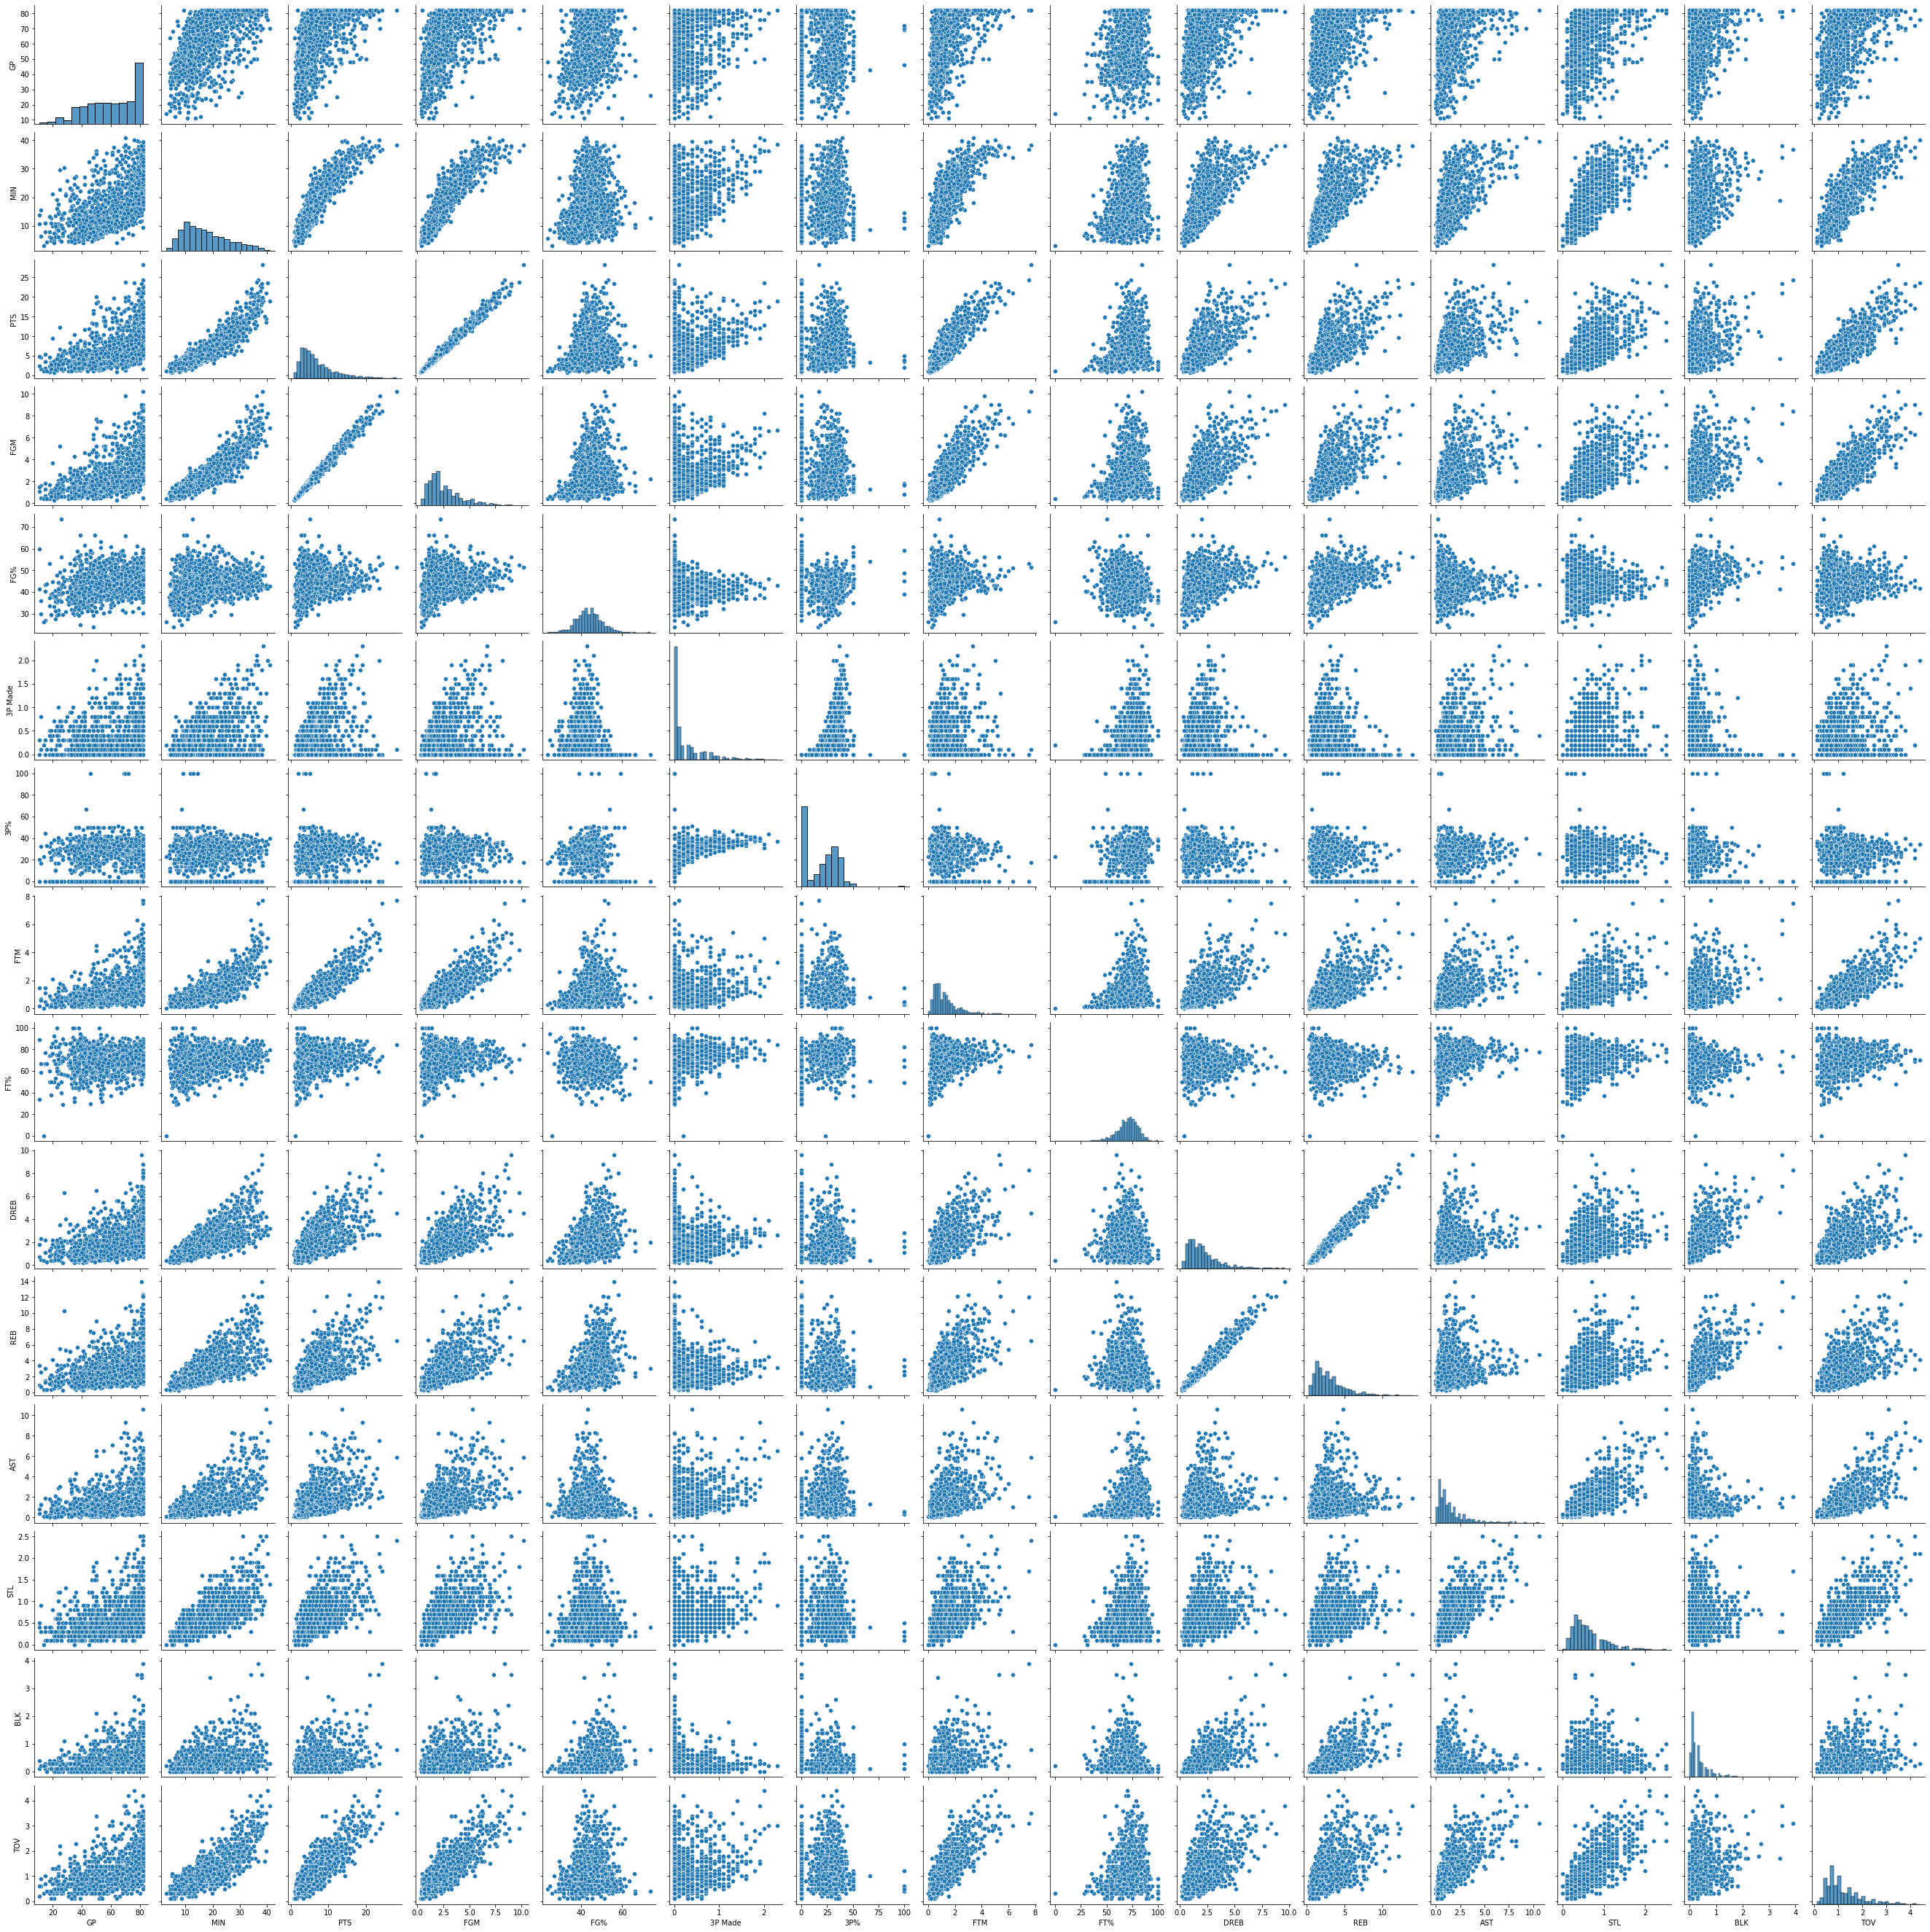

In [48]:
# prikazimo na jos jedan nacin linearnu zavisnost izmedjju atributa u datasetu
sns.pairplot(data[['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%',
                   'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']])

In [49]:
# kreiramo novi atribut na osnovu prosecnog vremena provedenog na terenu u prvoj godini
# vrednosti: 0-12min | 12-24min | 24-36min | 36-48min
quarter = []

for i in data['MIN']:
    if i >= 0 and i < 12:
        quarter.append('0-12min')
    elif i >= 12 and i < 24:
        quarter.append('12-24min')
    elif i >=24 and i < 36:
        quarter.append('24-36min')
    else:
        quarter.append('36-48min')
        
data['quarterMIN'] = quarter

In [50]:
data.head()

,GP,MIN,PTS,FGM,FG%,3P Made,3P%,FTM,FT%,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,key,quarterMIN
0,36,27.4,7.4,2.6,34.7,0.5,25.0,1.6,69.9,3.4,4.1,1.9,0.4,0.4,1.3,0,0,24-36min
1,35,26.9,7.2,2.0,29.6,0.7,23.5,2.6,76.5,2.0,2.4,3.7,1.1,0.5,1.6,0,1,24-36min
2,74,15.3,5.2,2.0,42.2,0.4,24.4,0.9,67.0,1.7,2.2,1.0,0.5,0.3,1.0,0,2,12-24min
3,58,11.6,5.7,2.3,42.6,0.1,22.6,0.9,68.9,0.9,1.9,0.8,0.6,0.1,1.0,1,3,0-12min
4,48,11.5,4.5,1.6,52.4,0.0,0.0,1.3,67.4,1.5,2.5,0.3,0.3,0.4,0.8,1,4,0-12min


In [51]:
data.groupby(['quarterMIN', 'TARGET_5Yrs']).agg({'GP':['count', 'mean', 'median'],
                                                 'PTS':['mean', 'median'],
                                                 'FG%':['mean', 'median'],
                                                 '3P%':['mean', 'median'],
                                                 'FT%':['mean', 'median'],
                                                 'REB':['mean', 'median'],
                                                 'AST':['mean', 'median'],
                                                 'STL':['mean', 'median'],
                                                 'BLK':['mean', 'median'],
                                                 'TOV':['mean', 'median']})

GP                        PTS              FG%  \
                       count      mean median      mean median      mean   
quarterMIN TARGET_5Yrs                                                     
0-12min    0             220  43.72273   43.0   3.01682    3.0  41.33364   
           1             179  50.66480   51.0   3.29888    3.2  43.40726   
12-24min   0             227  55.71366   57.0   5.63480    5.4  43.11189   
           1             375  67.39200   72.0   6.61467    6.4  46.02027   
24-36min   0              37  63.83784   70.0  11.78108   11.8  42.65405   
           1             214  74.28037   79.0  12.06402   11.7  45.63551   
36-48min   1              36  76.97222   79.5  18.97222   18.9  45.23611   

                                    3P%              FT%             REB  \
                       median      mean median      mean median     mean   
quarterMIN TARGET_5Yrs                                                     
0-12min    0            40.50  16.33773  18.65  66.14136  67.15  1.42364   
           1            43.10  15.48603  11.10  68.68771  69.00  1.61564   
12-24min   0            42.20  20.84890  25.00  70.55286  71.50  2.63744   
           1            45.60  18.72907  21.20  70.85120  71.30  3.25013   
24-36min   0            42.20  28.14054  32.20  74.61081  74.80  4.09189   
           1            45.65  22.19206  25.00  73.32710  74.25  5.14252   
36-48min   1            43.80  26.22778  29.40  75.25556  74.85  6.28889   

                                   AST             STL             BLK         \
                       median     mean median     mean median     mean median   
quarterMIN TARGET_5Yrs                                                          
0-12min    0             1.30  0.67136   0.50  0.29727   0.30  0.16455    0.1   
           1             1.50  0.71732   0.50  0.30391   0.30  0.20894    0.1   
12-24min   0             2.30  1.38194   1.10  0.58943   0.60  0.30000    0.2   
           1             3.20  1.41520   1.10  0.61227   0.60  0.41200    0.3   
24-36min   0             3.50  2.98108   2.80  0.99189   0.90  0.45676    0.3   
           1             4.70  2.70607   2.10  1.01869   1.00  0.64673    0.5   
36-48min   1             5.35  4.68611   3.95  1.48889   1.45  0.70833    0.4   

                            TOV         
                           mean median  
quarterMIN TARGET_5Yrs                  
0-12min    0            0.61773    0.6  
           1            0.65698    0.6  
12-24min   0            1.02907    1.0  
           1            1.16800    1.1  
24-36min   0            2.00270    1.9  
           1            1.95000    1.9  
36-48min   1            3.03333    3.0

In [52]:
# vidimo da nemamo igrace koji su igrali vise od 36 minuta u proseku u prvoj sezoni
# a da im je karijera trajala najvise 5 godina (moguca bitna varijabla za modela)
# ocigledno je da sa povecavanjem minutaze, rastu u prosecni brojevi u kolonama TOV,
# REB, BLK, AST, PTS bez obzira da li igraci zavrsili karijeru u prvih 5 godina ili ne
# najmanje je igraca koji su igrali u proseku 36 do 48 minuta, sto je ockivano za rookie sezonu

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from datetime import datetime

In [54]:
data.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TARGET_5Yrs', 'key',
       'quarterMIN'],
      dtype='object')

In [55]:
X = data[['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%',
          'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'key']]
y = data[['TARGET_5Yrs', 'key']]

X = X.set_index('key')
y = y.set_index('key')

# Prilikom podele skupa podataka na skupove za treniranje i testiranje, vodicemo racuna o stratifikaciji (parametar stratify). 
# Stratifikacija je nacin podele podataka kojim se cuva distribucija klasa.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

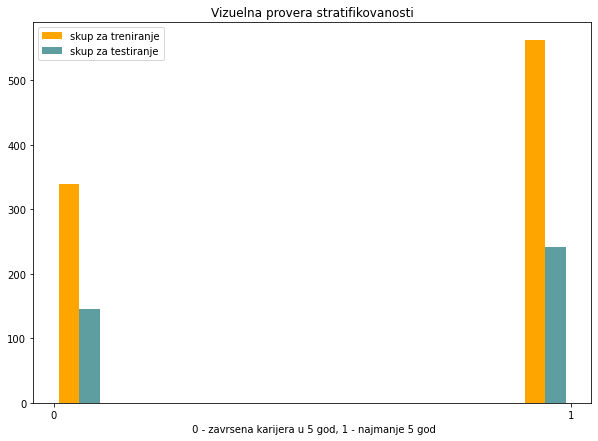

In [56]:
plt.figure(figsize=(10, 7))
plt.title("Vizuelna provera stratifikovanosti")
plt.xticks([0,1])
plt.xlabel(' 0 - zavrsena karijera u 5 god, 1 - najmanje 5 god')
plt.hist([y_train.values.ravel(), y_test.values.ravel()], color=['orange', 'cadetblue'], label=['skup za treniranje', 'skup za testiranje'])
plt.legend(loc='best')
plt.show()

In [57]:
# radimo standardizaciju podataka
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

** Logisticka regresija **

In [58]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=7, n_jobs=-1)

In [59]:
kfold = KFold(n_splits=5, shuffle=True,random_state=5)
cv_results_lr = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

In [60]:
print('CV mean je: {} \n CV std je: {}'.format(cv_results_lr.mean(), cv_results_lr.std()))

CV mean je: 0.7214180478821364 
 CV std je: 0.01738658938205689


In [61]:
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=7)

In [62]:
# rezultujuci parametri se mogu procitati kroz intercept_ i coef_ svojstva

In [63]:
print('Vrednost Bo koeficijentaje: {}.'.format(model.intercept_))

Vrednost Bo koeficijentaje: [0.70006313].


In [64]:
print('Vrednost ostalih parametara modela: \n{}'.format(model.coef_))

Vrednost ostalih parametara modela: 
[[ 0.70633641 -0.6507008   0.12026455  0.32369507  0.16863306  0.00585333
   0.11861905  0.00795946  0.18060831 -1.04144156  1.56298481  0.55065679
  -0.11026539  0.26187822 -0.02809302]]


In [65]:
# prikazimo vrednost koeficijenta svakog atributa graficki
# takodje, interpretacija vrednosti koeficijenata je vazna zbog razumevanja samog modela i uticaja atributa

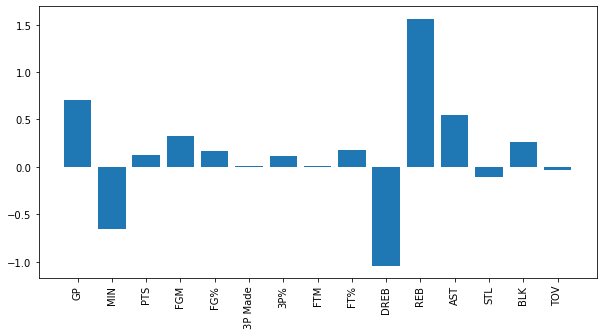

In [66]:
column_names = ['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
N = len(column_names)
values = model.coef_[0]
plt.figure(figsize = (10, 5))
plt.bar(np.arange(0, N),values)
plt.xticks(np.arange(0, N), column_names, rotation='vertical')

plt.show()

In [67]:
# na primer, na ovaj nacin se moze uvideti da atributi kao sto su MIN, DREB vazni u predviđanju negativne klase (0) 
# dok su atributi GP, REB vazni za predikciju pozitivne klase (1)

In [68]:
predictions_lr = model.predict(X_test)
print('Vrednost statistike Accuracy je: {}\n Matrica konfuzije:\n {}'.format(accuracy_score(y_test, predictions_lr), confusion_matrix(y_test, predictions_lr)))

Vrednost statistike Accuracy je: 0.710594315245478
 Matrica konfuzije:
 [[ 76  69]
 [ 43 199]]


In [69]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.64      0.52      0.58       145
           1       0.74      0.82      0.78       242

    accuracy                           0.71       387
   macro avg       0.69      0.67      0.68       387
weighted avg       0.70      0.71      0.70       387



In [70]:
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)

# cilj je smanjiti vrednosti koje nisu na glavnoj dijagonali u matrici konfuzije, odnosno povecati 
# vrednosti metrika precision i recall

# iz gore dobijenih rezultata mozemo zakljuciti da je model za 43 igraca rekao da ce 
# igrati manje od 5 godina odnosno oni su false negative (1,0)
# dok je 69 igraca nastavilo da igra kosarku nakon 5 godina po modelu dok su 
# oni medjutim oni u stvarnosti prestali da igraju kosarku
# ukoliko, npr pravimo model za prodaju necega (u bankarstvu za prodaju nekog 
# proizvoda), mi bismo tezili da povecamo vrednost statistike precision
# odnosno da smanjimo gresku koja je nama znacajnija tj da smanjimo one dogadjaje
# koji su predvidjeni kao 0  a u stvarnosti je to 1

In [71]:
predictions_lr_proba = model.predict_proba(X_test)

# sacuvajmo verovatnoce dogadjaja 0 odnosno 1 u dataframe kako bismo imali informaciju za svakog igraca
result_lr = pd.DataFrame({'proba 0':predictions_lr_proba[:,0], 
                          'proba 1':predictions_lr_proba[:,1],
                          'predicted values': predictions_lr}, index=y_test.index).reset_index()
result_lr = result_lr.merge(y_test, on='key', how='inner')

# primer
result_lr.head(5)

,key,proba 0,proba 1,predicted values,TARGET_5Yrs
0,1243,0.43150,0.56850,1,1
1,726,0.37657,0.62343,1,1
2,680,0.37809,0.62191,1,1
3,944,0.41265,0.58735,1,0
4,267,0.23384,0.76616,1,0


** Decision Tree **

In [74]:
print('Start proces {}'.format(datetime.now()))

clf = DecisionTreeClassifier()
params = {'min_samples_leaf':[10, 30, 50, 75, 100], 
          'criterion':['gini', 'entropy'], 
          'max_depth': [3, 4, 5, 6]}

gsearch = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
gs_fit = gsearch.fit(X_train, y_train)
print('End proces {}'.format(datetime.now()))

gs_result_dt = pd.DataFrame(gs_fit.cv_results_).sort_values('rank_test_score')
gs_result_dt[:5]

Start proces 2021-06-17 15:26:21.440516
Fitting 5 folds for each of 40 candidates, totalling 200 fits
End proces 2021-06-17 15:26:21.668554


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.0030,0.00089,0.0008,0.00040,gini,3,75,"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 75}",0.70718,0.71111,0.70000,0.67222,0.73889,0.70588,0.02138,1
18,0.0026,0.00049,0.0008,0.00040,gini,6,75,"{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 75}",0.70718,0.71111,0.70000,0.67222,0.73889,0.70588,0.02138,1
13,0.0034,0.00049,0.0002,0.00040,gini,5,75,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 75}",0.70718,0.71111,0.70000,0.67222,0.73889,0.70588,0.02138,1
8,0.0046,0.00049,0.0006,0.00049,gini,4,75,"{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 75}",0.70718,0.71111,0.70000,0.67222,0.73889,0.70588,0.02138,1
19,0.0032,0.00040,0.0004,0.00049,gini,6,100,"{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 100}",0.69613,0.71111,0.68333,0.67222,0.74444,0.70145,0.02511,5


In [75]:
# odabir najbolje kombinacije iz GridSearchCV
dt_clf = DecisionTreeClassifier(criterion='gini', 
                            max_depth=3,
                            min_samples_leaf=75,
                            random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=75, random_state=11)

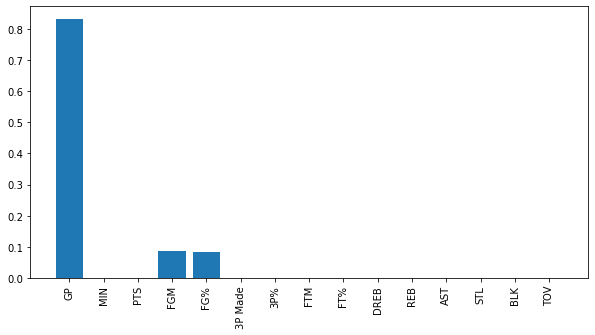

In [76]:
dt_clf.feature_importances_

column_names = ['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
N = len(column_names)
values = dt_clf.feature_importances_
plt.figure(figsize = (10, 5))
plt.bar(np.arange(0, N),values)
plt.xticks(np.arange(0, N), column_names, rotation='vertical')

plt.show()

In [77]:
predictions_dt = dt_clf.predict(X_test)
print('Vrednost statistike Accuracy je: {}\n Matrica konfuzije:\n {}'.format(accuracy_score(y_test, predictions_dt), confusion_matrix(y_test, predictions_dt)))

Vrednost statistike Accuracy je: 0.6821705426356589
 Matrica konfuzije:
 [[ 75  70]
 [ 53 189]]


In [78]:
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55       145
           1       0.73      0.78      0.75       242

    accuracy                           0.68       387
   macro avg       0.66      0.65      0.65       387
weighted avg       0.68      0.68      0.68       387



In [79]:
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)

# cilj je smanjiti vrednosti koje nisu na glavnoj dijagonali u matrici konfuzije, odnosno povecati 
# vrednosti metrika precision i recall

# iz gore dobijenih rezultata mozemo zakljuciti da je model za 53 igraca rekao da ce igrati 
# manje od 5 godina odnosno oni su false negative (1,0)
# dok je 70 igraca nastavilo da igra kosarku nakon 5 godina po modelu dok su oni 
# medjutim oni u stvarnosti prestali da igraju kosarku

In [80]:
predictions_dt_proba = dt_clf.predict_proba(X_test)

# sacuvajmo verovatnoce dogadjaja 0 odnosno 1 u dataframe kako bismo imali informaciju za svakog igraca
result_dt = pd.DataFrame({'proba 0':predictions_dt_proba[:,0], 
                          'proba 1':predictions_dt_proba[:,1],
                          'predicted values': predictions_dt}, index=y_test.index).reset_index()
result_dt = result_dt.merge(y_test, on='key', how='inner')

# primer
result_dt.head(5)

,key,proba 0,proba 1,predicted values,TARGET_5Yrs
0,1243,0.45455,0.54545,1,1
1,726,0.61078,0.38922,0,1
2,680,0.37008,0.62992,1,1
3,944,0.37008,0.62992,1,0
4,267,0.24841,0.75159,1,0


** XGBoost **

In [ ]:
# XGBoost u kombinaciji sa GridSearchCV
print('Start proces {}'.format(datetime.now()))

clf = xgb.XGBClassifier(seed=1)
params = {'learning_rate':[0.01], 
          'n_estimators':[2000], 
          'min_child_weight':[0.5, 1, 3, 5],
          'gamma': [0.5, 0.75, 1, 1.25, 1.5],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth': [3, 4, 5, 6, 7, 8],
          'tree_method':['gpu_hist'],
          'n_jobs':[-1]}

gsearch = GridSearchCV(clf, param_grid=params, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
gs_fit = gsearch.fit(X_train, y_train.values.ravel())
print('End proces {}'.format(datetime.now()))

gs_result_xgb = pd.DataFrame(gs_fit.cv_results_).sort_values('rank_test_score')

In [85]:
# sacuvajmo rezultate da ne bi ponovo pokretali ceo GS
gs_result_xgb.to_excel('Xgboost_result.xlsx')

In [82]:
gs_result_xgb = pd.read_excel('Xgboost_result.xlsx')
gs_result_xgb[:3]                          

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_n_jobs,param_subsample,param_tree_method,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,80,47.85032,1.00890,0.0084,0.00174,0.75,0.01,3,3.0,2000,-1,1.0,gpu_hist,"{'gamma': 0.75, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 2000, 'n_jobs': -1, 'subsample': 1.0, 'tree_method': 'gpu_hist'}",0.72928,0.73889,0.68889,0.73889,0.76667,0.73252,0.02514,1
1,152,45.84067,0.77851,0.0198,0.02174,1.00,0.01,3,3.0,2000,-1,1.0,gpu_hist,"{'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 2000, 'n_jobs': -1, 'subsample': 1.0, 'tree_method': 'gpu_hist'}",0.72376,0.73889,0.68889,0.73889,0.76667,0.73142,0.02538,2
2,296,44.13029,0.64634,0.0056,0.00102,1.50,0.01,3,3.0,2000,-1,1.0,gpu_hist,"{'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 2000, 'n_jobs': -1, 'subsample': 1.0, 'tree_method': 'gpu_hist'}",0.72376,0.73889,0.69444,0.72222,0.75000,0.72586,0.01875,3


In [83]:
# kombinacija sa najboljim rezultatima u GridSearch-u
gs_result_xgb.iloc[0]['params']

"{'gamma': 0.75, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 2000, 'n_jobs': -1, 'subsample': 1.0, 'tree_method': 'gpu_hist'}"

In [85]:
# odabir najbolje kombinacije iz GridSearchCV
xgb_clf = xgb.XGBClassifier(learning_rate=0.01, 
                            min_child_weight=3,
                            n_estimators=2000,
                            gamma=0.75,
                            max_depth=3,
                            subsample=1.0,
                            tree_method='gpu_hist',
                            n_jobs=-1,
                            random_state=11)

xgb_clf.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.75, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=2000, n_jobs=-1, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

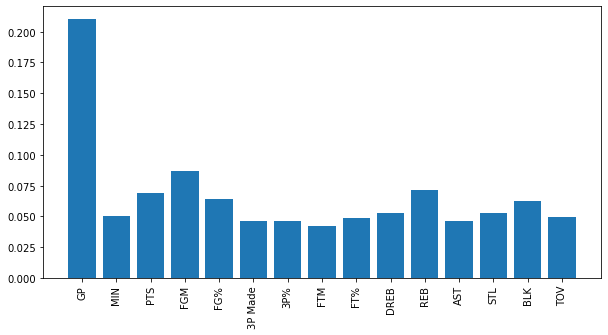

In [86]:
N = len(column_names)
values = xgb_clf.feature_importances_
plt.figure(figsize = (10, 5))
plt.bar(np.arange(0, N),values)
plt.xticks(np.arange(0, N), column_names, rotation='vertical')

plt.show()

In [87]:
# ovde mozemo videti da je nauticajniji atribut bio GP, a da se po vaznosti jos isticu atributi: FGM, PTS, REB, FG%...
# primetimo i da je uticaj atributa kod logisticke regresije slican kao i kod XGBoost-a
# primer gde vidimo odstupanje je atribut MIN (kod log regresije je bio vazan dok je kod XGBoost-a nije u "prvom planu")

In [88]:
predictions_xgb = xgb_clf.predict(X_test)
print('Vrednost statistike Accuracy je: {}\n Matrica konfuzije:\n {}'.format(accuracy_score(y_test, predictions_xgb), confusion_matrix(y_test, predictions_xgb)))

Vrednost statistike Accuracy je: 0.6770025839793282
 Matrica konfuzije:
 [[ 79  66]
 [ 59 183]]


In [89]:
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56       145
           1       0.73      0.76      0.75       242

    accuracy                           0.68       387
   macro avg       0.65      0.65      0.65       387
weighted avg       0.67      0.68      0.68       387



In [90]:
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)

# cilj je smanjiti vrednosti koje nisu na glavnoj dijagonali u matrici konfuzije, odnosno povecati 
# vrednosti metrika precision i recall

# iz gore dobijenih rezultata mozemo zakljuciti da je model za 59 igraca rekao da ce 
# igrati manje od 5 godina odnosno oni su false negative (1,0)
# dok je 69 igraca nastavilo da igra kosarku nakon 5 godina po modelu dok su oni 
# medjutim oni u stvarnosti prestali da igraju kosarku

In [91]:
predictions_xgb_proba = xgb_clf.predict_proba(X_test)

# sacuvajmo verovatnoce dogadjaja 0 odnosno 1 u dataframe kako bismo imali informaciju za svakog igraca
result_xgb = pd.DataFrame({'proba 0':predictions_xgb_proba[:,0], 
                          'proba 1':predictions_xgb_proba[:,1],
                          'predicted values': predictions_xgb}, index=y_test.index).reset_index()
result_xgb = result_xgb.merge(y_test, on='key', how='inner')

# primer
result_xgb.head(5)

,key,proba 0,proba 1,predicted values,TARGET_5Yrs
0,1243,0.26509,0.73491,1,1
1,726,0.50526,0.49474,0,1
2,680,0.33702,0.66298,1,1
3,944,0.32819,0.67181,1,0
4,267,0.41897,0.58103,1,0


** Poredjenje Alogritama **

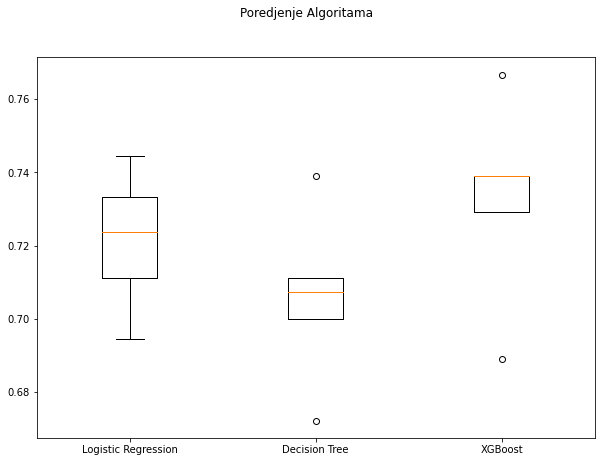

In [92]:
# cv_results_lr
cv_results_dt = np.array([gs_result_dt.iloc[0]['split0_test_score'], gs_result_dt.iloc[0]['split1_test_score'], gs_result_dt.iloc[0]['split2_test_score'], gs_result_dt.iloc[0]['split3_test_score'], gs_result_dt.iloc[0]['split4_test_score']])
cv_results_xgb = np.array([gs_result_xgb.iloc[0]['split0_test_score'], gs_result_xgb.iloc[0]['split1_test_score'], gs_result_xgb.iloc[0]['split2_test_score'], gs_result_xgb.iloc[0]['split3_test_score'], gs_result_xgb.iloc[0]['split4_test_score']])

results = [cv_results_lr, cv_results_dt, cv_results_xgb]
names = ['Logistic Regression', 'Decision Tree', 'XGBoost']

fig = plt.figure(figsize=(10, 7))
fig.suptitle('Poredjenje Algoritama')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [93]:
print('Rezultati algoritama prilikom obucavanja modela: ')
print('Logistic Regression: {}'.format(cv_results_lr.mean()))
print('Decision Tree: {}'.format(cv_results_dt.mean()))
print('XGBoost algorithm: {}'.format(cv_results_xgb.mean()))

Rezultati algoritama prilikom obucavanja modela: 
Logistic Regression: 0.7214180478821364
Decision Tree: 0.7058809085328424
XGBoost algorithm: 0.7325230202578268


In [94]:
print('Rezultati algoritama na testnom skupu: ')
print('Logistic Regression: {}'.format(accuracy_score(y_test, predictions_lr)))
print('Decision Tree: {}'.format(accuracy_score(y_test, predictions_dt)))
print('XGBoost algorithm: {}'.format(accuracy_score(y_test, predictions_xgb)))

Rezultati algoritama na testnom skupu: 
Logistic Regression: 0.710594315245478
Decision Tree: 0.6821705426356589
XGBoost algorithm: 0.6770025839793282


In [95]:
# mozemo videti da je najbolje rezultate na trening skupu imao XGBoost algoritam, medjutim, ukoliko pogledamo rezultate na
# testnom skupu mozemo videti da je XGBoost imao najlosije rezultate. Na Testnom skupu se najbolje pokazala logisticka regresija
# Model logisticke regresije je ostvario rezultat od 71.06% dok je na trening skupu taj rezultat bio 72.14%

In [96]:
# sto se tice tacnosti modela, tacnost od 71%, nije preterano velika medjutim, to je ujedno i posledica malog broja dogadjaja
# imali smo svega cca 1300, kao i osiromasengo dataseta u smislu atributa. Atributi su bili osnovne statistike sa meca, koje po
# mom misljenju nisu adekvatne za ovaj tip problema. Obogacivanjem dataseta drugim atributima povecala bi se i realizacija, odnosno
# povecala bi se tacnost predvidjanja
# ono sto je model dobro uradio jeste da je prepoznao one atribute koje sam prilikom analize naznacio kao moguce bitne za 
# bolje predvidjanje (GP, PTS, MIN)